In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
from shapely.geometry import Point
import contextily as cxt

In [2]:
control = pd.read_table("10160609_controlpoints_son.txt",names=["ID","Longitude","Latitude","H","h"])

In [3]:
test = pd.read_table("10160609_testpoints_son.txt",names=["ID","Longitude","Latitude","H","h"])

In [4]:
control["N"]=control["h"]-control["H"]

In [5]:
test["N"]=test["h"]-test["H"]

In [6]:
control
longitude=np.radians(control["Longitude"])
latitude=np.radians(control["Latitude"])

In [7]:
len(longitude)
line=[]

In [29]:
for i in range (len(longitude)):
    row=[1,np.cos(latitude[i])*np.cos(longitude[i]),np.cos(latitude[i])*np.sin(longitude[i]),np.sin(latitude[i])]
    line.append(row)
line

[[1, 0.6595325780188597, 0.3656319097666825, 0.6567572497446567],
 [1, 0.6581606036908656, 0.36378211398312493, 0.659156425513128],
 [1, 0.6592481280573276, 0.36591993799799843, 0.6568824130911486],
 [1, 0.6581140049735796, 0.3665146722505948, 0.6576875789329417],
 [1, 0.6580636510941571, 0.3654385747049979, 0.6583364483500872],
 [1, 0.6609447315302571, 0.36354553727264993, 0.6564957762175905],
 [1, 0.6595078238293762, 0.36250655206711047, 0.6585122853950834],
 [1, 0.6612361659101976, 0.3635541857888053, 0.6561974450482266],
 [1, 0.6590106036670486, 0.36742145628040834, 0.6562823307991585],
 [1, 0.6598297609054865, 0.3665941940488107, 0.6559217815510562],
 [1, 0.6596456135305927, 0.3648521267029298, 0.6570773091426891],
 [1, 0.6579555531383209, 0.364838335833315, 0.6587772603853471],
 [1, 0.658810851463634, 0.36360304039558405, 0.6586054137409203],
 [1, 0.658488643354381, 0.3635054231520071, 0.6589814215229343],
 [1, 0.6601586879068171, 0.36424616771380836, 0.656898193091558],
 [1, 0.6

In [28]:
line
A=np.array(line).reshape(len(longitude),4)
A

array([[1.        , 0.65953258, 0.36563191, 0.65675725],
       [1.        , 0.6581606 , 0.36378211, 0.65915643],
       [1.        , 0.65924813, 0.36591994, 0.65688241],
       [1.        , 0.658114  , 0.36651467, 0.65768758],
       [1.        , 0.65806365, 0.36543857, 0.65833645],
       [1.        , 0.66094473, 0.36354554, 0.65649578],
       [1.        , 0.65950782, 0.36250655, 0.65851229],
       [1.        , 0.66123617, 0.36355419, 0.65619745],
       [1.        , 0.6590106 , 0.36742146, 0.65628233],
       [1.        , 0.65982976, 0.36659419, 0.65592178],
       [1.        , 0.65964561, 0.36485213, 0.65707731],
       [1.        , 0.65795555, 0.36483834, 0.65877726],
       [1.        , 0.65881085, 0.36360304, 0.65860541],
       [1.        , 0.65848864, 0.36350542, 0.65898142],
       [1.        , 0.66015869, 0.36424617, 0.65689819],
       [1.        , 0.65963793, 0.36635077, 0.65625065],
       [1.        , 0.65772476, 0.3666921 , 0.65797799],
       [1.        , 0.65987222,

In [10]:
At=np.transpose(A).reshape(4,len(longitude))

In [11]:
np.savetxt("A_matris_son.txt",A)

In [12]:
np.savetxt("At_matris_son.txt",At)

In [13]:
l=np.array(control["N"]).reshape(len(longitude),1)

In [14]:
N=np.matmul(At,A).reshape(4,4)

In [15]:
Ninverse=np.linalg.inv(N)

In [16]:
n=np.matmul(At,l)

In [17]:
x=np.matmul(Ninverse,n)
np.savetxt("x_matris_son.txt",x)

In [18]:
v=(np.matmul(A,x))-l
np.savetxt("v_matris_son.txt",v)

In [19]:
result=v+l

In [20]:
np.savetxt("N_matris_son.txt",N)

In [21]:
dftest=pd.DataFrame(test)
dfcontrol=pd.DataFrame(control)
crs= {'init': 'epsg:8995'}
geometrytest = [Point(xy) for xy in zip(dftest["Longitude"],dftest["Latitude"])]
geometrycontrol = [Point(xy) for xy in zip(dfcontrol["Longitude"],dfcontrol["Latitude"])]
geodftest=gpd.GeoDataFrame(dftest,crs=crs,geometry=geometrytest)
geodfcontrol=gpd.GeoDataFrame(dfcontrol,crs=crs,geometry=geometrycontrol)
plotcontrol=geodfcontrol.to_crs(epsg=3857)
plottest=geodftest.to_crs(epsg=3857)





C:\Users\Techno\anaconda3\envs\geo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


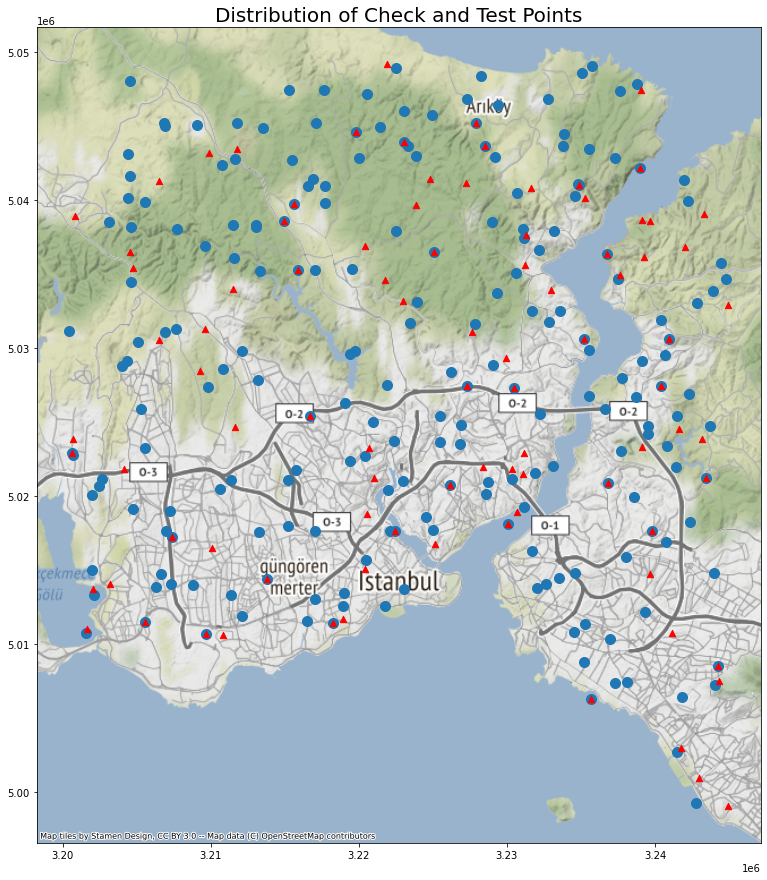

In [22]:
ax = plotcontrol.plot(figsize=(15,15),marker="o",markersize=100)
plottest.plot(ax=ax,marker="^",markersize=40,color="red")
cxt.add_basemap(ax,source=cxt.OpenStreetMap.Terrain)
ax.set_title("Distribution of Check and Test Points on Topography",fontsize=20)
plt.savefig('Distirubution_point.png')


[[36.529000000000025, array([36.36212649])],
 [36.46499999999999, array([36.45566813])],
 [36.453, array([36.44121166])],
 [36.565, array([36.7449692])],
 [36.58800000000001, array([36.58247251])],
 [36.44300000000001, array([36.40903028])],
 [36.494, array([36.50700654])],
 [36.64300000000001, array([36.73482178])],
 [36.56099999999999, array([36.66467257])],
 [36.375, array([36.39772689])],
 [36.637000000000015, array([36.60829555])],
 [36.38899999999998, array([36.30506422])],
 [36.477000000000004, array([36.46845965])],
 [36.726, array([36.63085508])],
 [36.371999999999986, array([36.40198478])],
 [36.537, array([36.37644592])],
 [36.51200000000001, array([36.49055346])],
 [36.33000000000001, array([36.37719542])],
 [36.263, array([36.3318877])],
 [36.607, array([36.52880755])],
 [36.748999999999995, array([36.75310919])],
 [36.77699999999999, array([36.63475521])],
 [36.68499999999999, array([36.65828823])],
 [36.196999999999974, array([36.29010456])],
 [36.56900000000001, array([

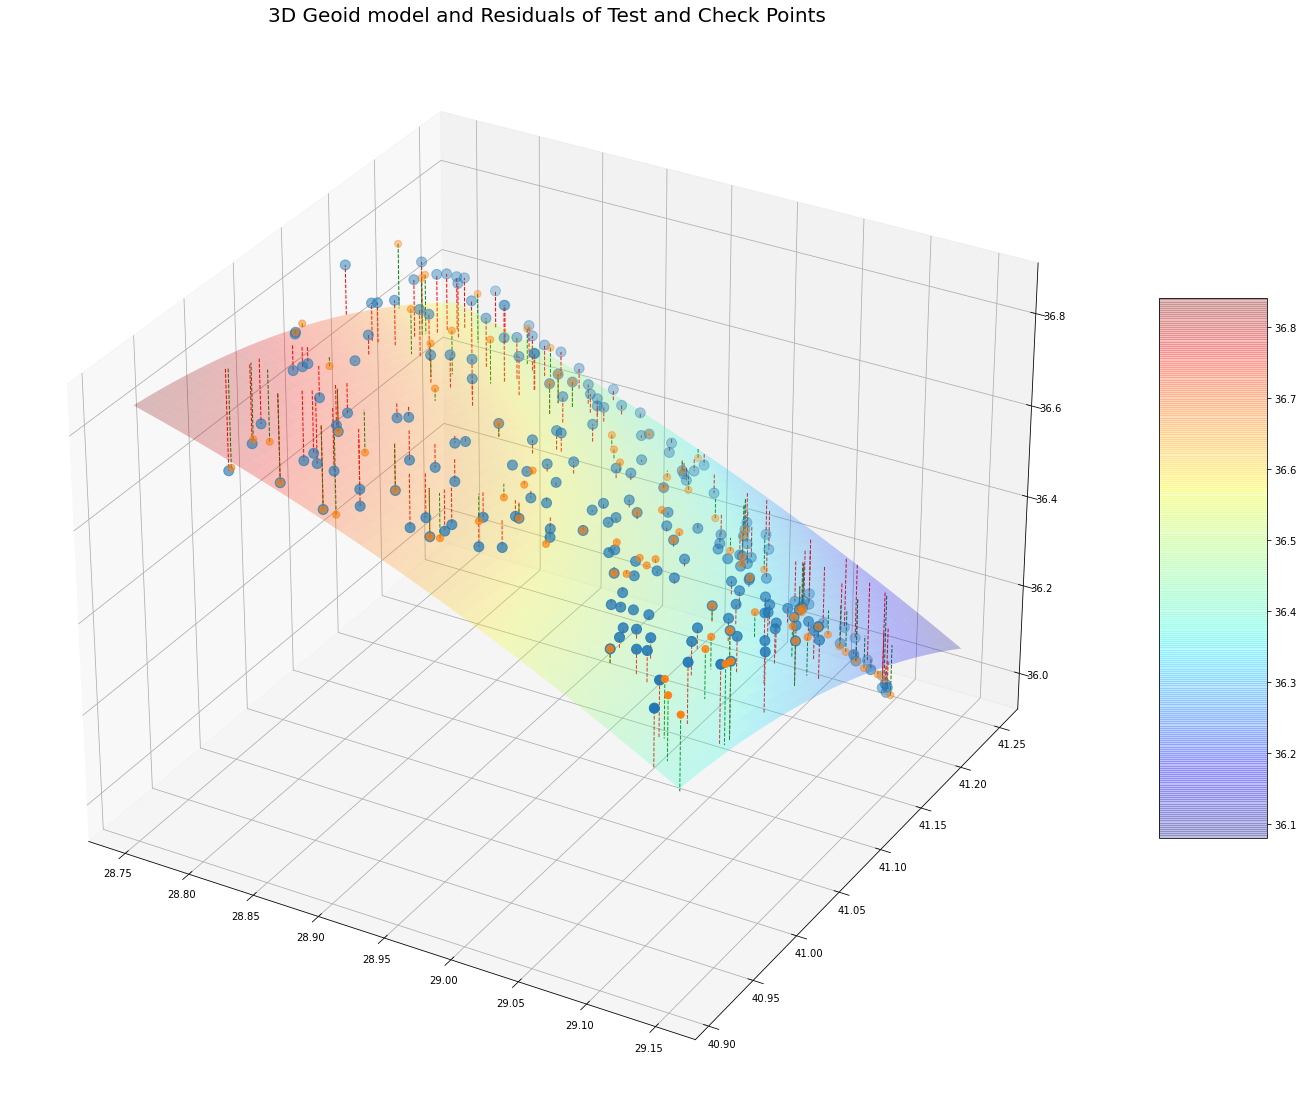

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sys import argv
control["result"]=result
Xc=control["Longitude"]
Yc=control["Latitude"]
Zc=control["result"]
Xt=test["Longitude"]
Yt=test["Latitude"]
Zt=test["N"]
Xcs=np.linspace(Xc.min(),Xc.max(),100)
Ycs=np.linspace(Yc.min(),Yc.max(),100)
X,Y=np.meshgrid(Xcs,Ycs)
geoidcontrol=x[0]+np.cos(np.radians(Y))*np.cos(np.radians(X))*x[1]+np.cos(np.radians(Y))*np.sin(np.radians(X))*x[2]+np.sin(np.radians(Y))*x[3]
fig = plt.figure(figsize=(20,15))
ax = Axes3D(fig)
surface = ax.plot_surface(X, Y, geoidcontrol, cmap=cm.jet, linewidth=0.1, alpha=0.25)
testz=[]
fig.colorbar(surface, shrink=0.5, aspect=5)
ax.set_title("3D Geoid model and Residuals of Test and Check Points",size=20)
ax.scatter(Xc,Yc,control["N"], s=100)
ax.scatter(Xt,Yt,Zt, s=50)

for i in range(len(Xc)):
    xx = [control["Longitude"][i], control["Longitude"][i]]
    yy = [control["Latitude"][i], control["Latitude"][i]]
    zz = [x[0]+np.cos(np.radians(Yc[i]))*np.cos(np.radians(Xc[i]))*x[1]+np.cos(np.radians(Yc[i]))*np.sin(np.radians(Xc[i]))*x[2]+np.sin(np.radians(Yc[i]))*x[3], control["N"][i]]
    ax.plot(xx,yy,zz, "r--", alpha=1.0, linewidth=1,)
for i in range(len(Xt)):
    xxx = [test["Longitude"][i], test["Longitude"][i]]
    yyy = [test["Latitude"][i], test["Latitude"][i]]
    zzz = [test["N"][i], x[0]+np.cos(np.radians(Yt[i]))*np.cos(np.radians(Xt[i]))*x[1]+np.cos(np.radians(Yt[i]))*np.sin(np.radians(Xt[i]))*x[2]+np.sin(np.radians(Yt[i]))*x[3]]
    ax.plot(xxx,yyy,zzz, "g--", alpha=1.0, linewidth=1,)
    testz.append(zzz)
plt.savefig('3d_geoid.png')
testz

In [33]:
testv=[]

for i in range (len(testz)):
    vvt=testz[i][1][0]-testz[i][0]
    testv.append(vvt)


In [26]:
control.to_excel("Control_son.xlsx")
test.to_excel("Test_son.xlsx")